In [ ]:
!pip install seaborn

In [ ]:
import plotly.figure_factory as ff
import numpy as N
x = N.random.randn(500)
data = [x]
label = ['DISTPLOT'] 
output = ff.create_distplot(data, label)
output.show()

In [ ]:
import torch
similarities = torch.load('../datasets/embeddings/similarity_result.pt')

In [ ]:
similarities[list(similarities.keys())[0]]

In [ ]:
import plotly.figure_factory as ff
import numpy as N
# x = N.random.randn(500)
# data = [x]
data = []
for key in similarities.keys():
    data.append([similarities[key]])
    for poc in similarities[key]:
        print(len(similarities[key]))
        data.append([similarities[key][poc]])
    break
    
label = ['DISTPLOT'] 
output = ff.create_distplot(data, label)
output.show()

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff


fig = go.Figure()

pocs = []
values = []
for key in similarities.keys():
    for poc in similarities[key]:
        pocs.append(poc)
        try:
            values.append(similarities[key][poc].item())
        except:
            values.append(similarities[key][poc])
    break




trace1 = go.Scatter(x=pocs, y=values,
                    marker=dict(color='#0099ff'),
                    name='Similarity With Pocs',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
# fig.layout.margin.update({'t':50, 'b':100})
# fig.layout.update({'title': '2016 Hockey Stats'})

fig.show()

In [ ]:
import plotly.graph_objects as go

import numpy as np

x0 = np.random.randn(2000)
print((x0))
x1 = np.random.randn(2000) + 1
print((x1))
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
mapping = {}
i = 1
for key in similarities.keys():
    for poc in similarities[key]:
        mapping[poc] = i
        i += 1
    break

In [ ]:
mapping

In [ ]:
import seaborn
import pandas
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(40,10)})
plt.ylim(0,1)
plt.xlim(0, 108)
i = 6
for key in similarities.keys():
    if i == 0:
        break
    i -= 1
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            values.append(similarities[key][poc].item())
        except:
            values.append(similarities[key][poc])
    res = seaborn.lineplot(x=pocs, y=values, label=key)
    res.set(xticks= pocs)
    
plt.show()



993


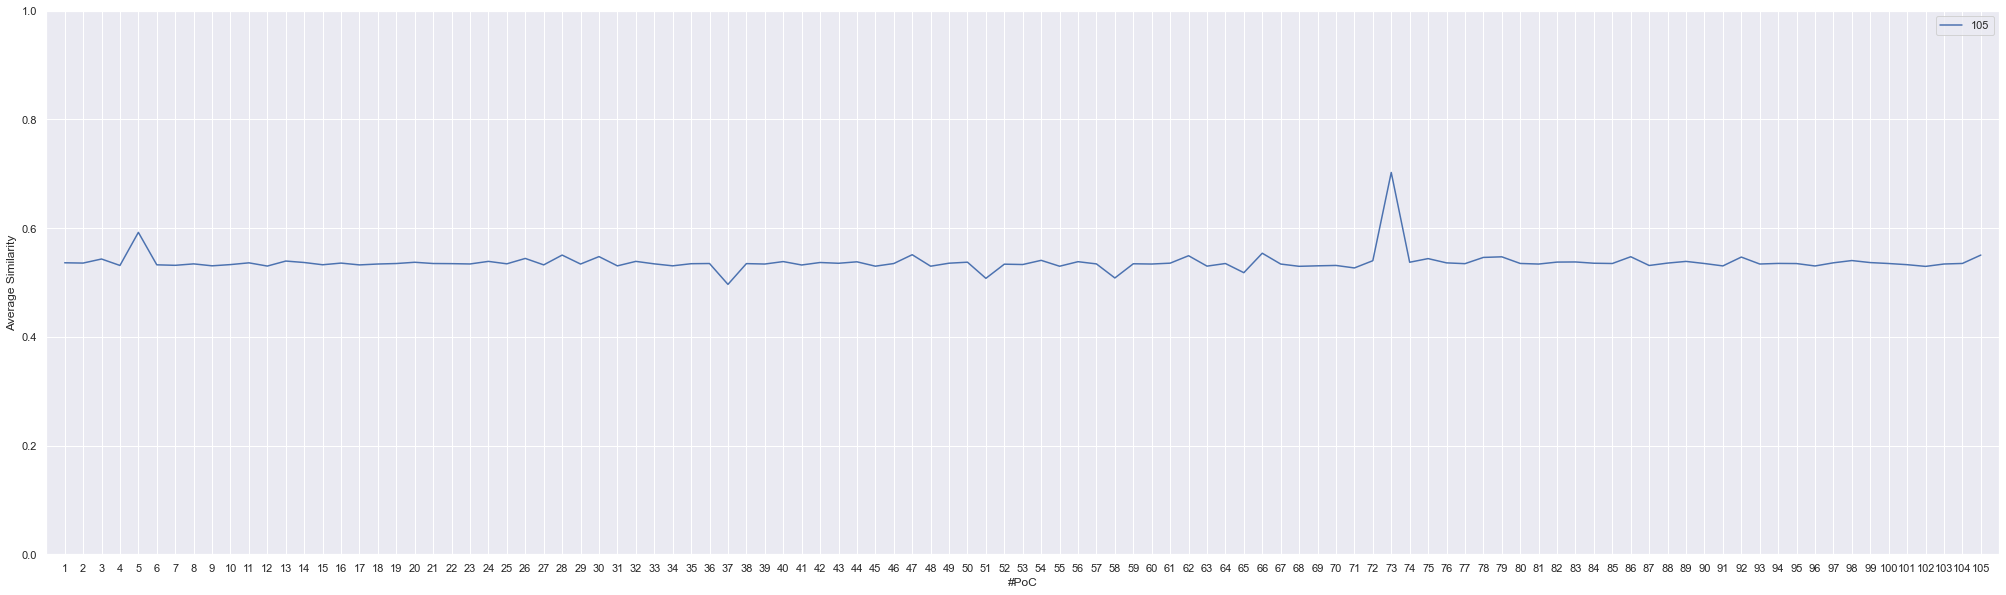

In [79]:
import seaborn
import pandas
import matplotlib.pyplot as plt

# Load similarities
import torch
similarities = torch.load('../datasets/embeddings/final_similarity_result.pt')

# Create mapping for x-axis labels
mapping = {}
i = 1
for key in similarities.keys():
    for poc in similarities[key]:
        mapping[poc] = i
        i += 1
    break

# Create function to query mapping
def get_poc(n):
    return list(mapping.keys())[n-1]

seaborn.set(rc={'figure.figsize':(35,10)})
plt.ylim(0,1)
plt.xlim(0, 106)
count = 0
acc = {}
for key in similarities.keys():
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            a = acc[mapping[poc]]
        except:
            acc[mapping[poc]] = 0
        try:
            acc[mapping[poc]] += similarities[key][poc].item()
        except:
            acc[mapping[poc]] += similarities[key][poc]
    count += 1

means = []
for key in acc.keys():
    means.append(acc[key]/count)


res = seaborn.lineplot(x=pocs, y=means, label=key)
res.set(xticks= pocs)
plt.xlabel('#PoC')
plt.ylabel('Average Similarity')
#plt.xticks(rotation=45)
print(count)
plt.show()



In [8]:
import torch

results = {}

similarities = torch.load('../datasets/embeddings/similarity_result.pt')
print(len(list(similarities.keys())))
results.update(similarities)
print(len(list(results.keys())))
#print(list(similarities.keys())[-1])
similarities = torch.load('../datasets/embeddings/300_400.pt')
print(len(list(similarities.keys())))
results.update(similarities)
print(len(list(results.keys())))
#print(list(similarities.keys())[0])

similarities = torch.load('../datasets/embeddings/401_500.pt')
print(len(list(similarities.keys())))
results.update(similarities)
print(len(list(results.keys())))
similarities = torch.load('../datasets/embeddings/501_600.pt')
print(len(list(similarities.keys())))
results.update(similarities)
print(len(list(results.keys())))
similarities = torch.load('../datasets/embeddings/601_700.pt')
print(len(list(similarities.keys())))
results.update(similarities)
print(len(list(results.keys())))
similarities = torch.load('../datasets/embeddings/701_800.pt')
print(len(list(similarities.keys())))
results.update(similarities)
print(len(list(results.keys())))
similarities = torch.load('../datasets/embeddings/801_900.pt')
print(len(list(similarities.keys())))
results.update(similarities)
print(len(list(results.keys())))
similarities = torch.load('../datasets/embeddings/901_993.pt')
print(len(list(similarities.keys())))
results.update(similarities)
print(len(list(results.keys())))

300
300
100
400
99
499
99
598
99
697
99
796
99
895
92
987


In [8]:
import torch

similarities = torch.load('../datasets/embeddings/000_250.pt')
print(len(list(similarities.keys())))
similarities = torch.load('../datasets/embeddings/251_500.pt')
print(len(list(similarities.keys())))
# similarities = torch.load('../datasets/embeddings/501_750_all_exes.pt')
# print(len(list(similarities.keys())))
similarities = torch.load('../datasets/embeddings/751_993.pt')
print(len(list(similarities.keys())))


6
2
6


In [54]:
import torch
results = torch.load('../datasets/embeddings/final_similarity_result.pt')

In [30]:
from copy import deepcopy
new_results = deepcopy(results)




In [52]:
for hash in results.keys():
    for poc in results[hash]:
        if 'pl' in poc:
            del new_results[hash][poc]

In [35]:
len(list(results.keys()))

993

In [53]:
torch.save(new_results, '../datasets/embeddings/final_similarity_result.pt')

In [16]:
300
100
99
99
99
99
71
63

'2242'

'0044'

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107])
dict_values([74, 74, 76, 75, 79, 74, 74, 74, 74, 75, 75, 74, 78, 75, 0, 75, 74, 74, 74, 64, 74, 75, 73, 76, 74, 75, 74, 74, 75, 75, 74, 75, 74, 76, 74, 74, 74, 74, 109, 74, 74, 74, 74, 73, 73, 75, 74, 75, 75, 72, 74, 74, 68, 73, 74, 75, 75, 74, 74, 69, 74, 74, 75, 75, 72, 74, 71, 74, 74, 74, 74, 74, 74, 77, 143, 75, 75, 73, 74, 75, 75, 76, 74, 77, 75, 75, 74, 74, 75, 75, 76, 72, 74, 75, 74, 74, 74, 73, 75, 75, 75, 74, 74, 73, 74, 76, 75])


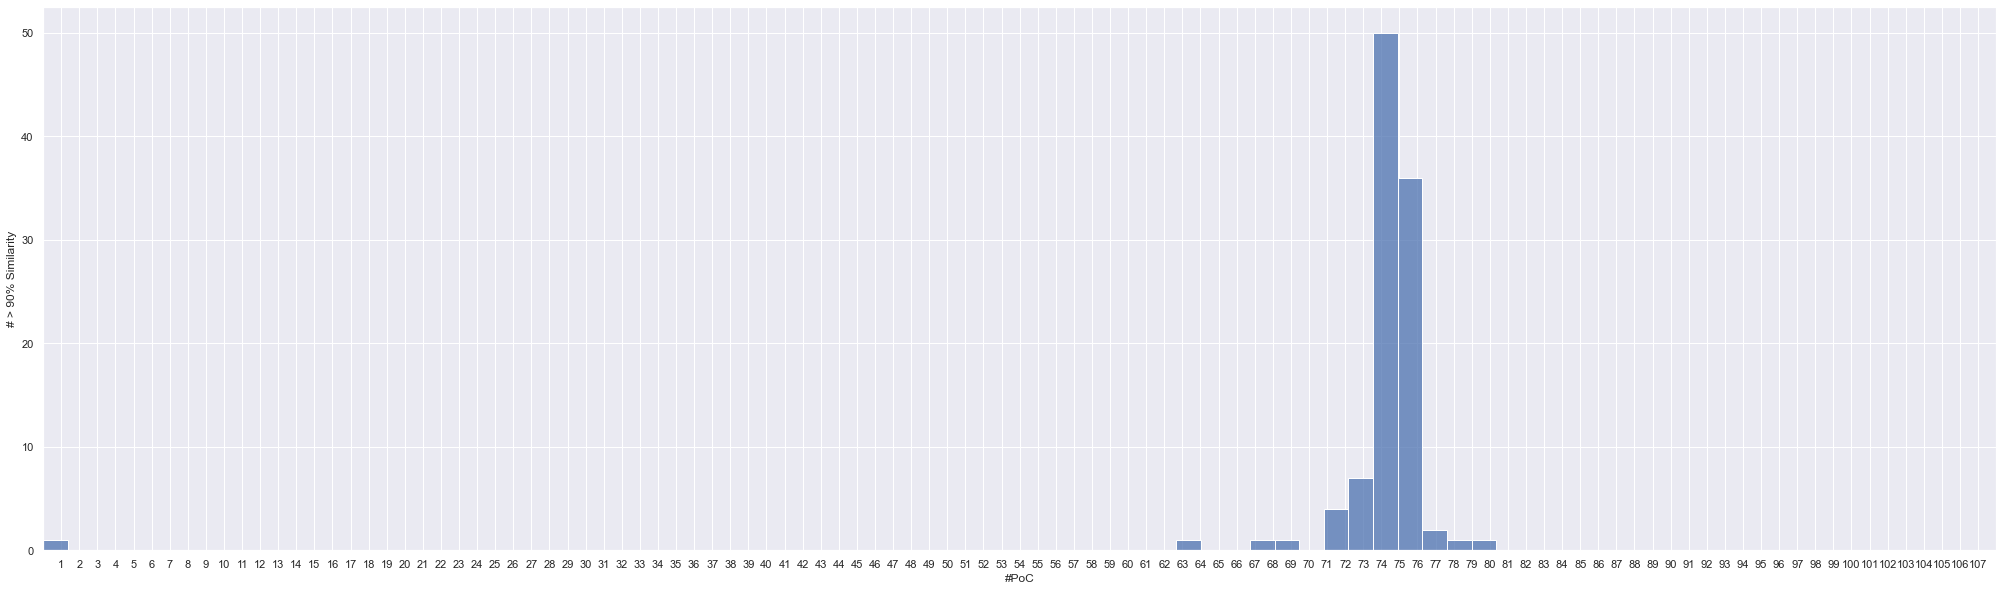

In [78]:
import seaborn
import pandas
import matplotlib.pyplot as plt
import pandas as pd

# Load similarities
import torch
similarities = torch.load('../datasets/embeddings/similarity_result.pt')

# Create mapping for x-axis labels
mapping = {}
i = 1
for key in similarities.keys():
    for poc in similarities[key]:
        mapping[poc] = i
        i += 1
    break

# Create function to query mapping
def get_poc(n):
    return list(mapping.keys())[n-1]

seaborn.set(rc={'figure.figsize':(35,10)})
#plt.ylim(0,1)
plt.xlim(0, 108)
acc = {}
threshold = 0.8
for key in similarities.keys():
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            a = acc[mapping[poc]]
        except:
            acc[mapping[poc]] = 0
        try:
            if similarities[key][poc].item() > threshold:
                acc[mapping[poc]] += 1
        except:
            if similarities[key][poc] > threshold:
                acc[mapping[poc]] += 1

means = []
for key in acc.keys():
    means.append(acc[key])
#res = seaborn.distplot(acc, bins = 107, x = list(acc.keys()), y = list(acc.values()), kde=True, discrete=True)
print(acc.keys())
print(acc.values())
res = seaborn.histplot(list(acc.values()), bins = 105)
res.set(xticks= pocs)
plt.xlabel('#PoC')
plt.ylabel('# > 90% Similarity')
#plt.xticks(rotation=45)
#print(count)
plt.show()



In [87]:
acc

{1: 21,
 2: 21,
 3: 21,
 4: 21,
 5: 21,
 6: 21,
 7: 21,
 8: 21,
 9: 21,
 10: 21,
 11: 21,
 12: 21,
 13: 22,
 14: 21,
 15: 0,
 16: 21,
 17: 21,
 18: 21,
 19: 21,
 20: 19,
 21: 21,
 22: 21,
 23: 21,
 24: 21,
 25: 21,
 26: 21,
 27: 21,
 28: 21,
 29: 21,
 30: 21,
 31: 21,
 32: 21,
 33: 21,
 34: 21,
 35: 21,
 36: 21,
 37: 21,
 38: 21,
 39: 30,
 40: 21,
 41: 21,
 42: 21,
 43: 21,
 44: 21,
 45: 21,
 46: 21,
 47: 21,
 48: 21,
 49: 21,
 50: 21,
 51: 21,
 52: 21,
 53: 21,
 54: 21,
 55: 21,
 56: 21,
 57: 21,
 58: 21,
 59: 21,
 60: 21,
 61: 21,
 62: 21,
 63: 21,
 64: 21,
 65: 21,
 66: 21,
 67: 21,
 68: 21,
 69: 21,
 70: 21,
 71: 21,
 72: 21,
 73: 21,
 74: 22,
 75: 39,
 76: 21,
 77: 21,
 78: 21,
 79: 21,
 80: 21,
 81: 21,
 82: 21,
 83: 21,
 84: 22,
 85: 21,
 86: 21,
 87: 21,
 88: 21,
 89: 21,
 90: 21,
 91: 21,
 92: 21,
 93: 21,
 94: 21,
 95: 21,
 96: 21,
 97: 21,
 98: 21,
 99: 21,
 100: 21,
 101: 21,
 102: 21,
 103: 21,
 104: 21,
 105: 21,
 106: 21,
 107: 21}

In [6]:
def get_poc(n):
    return list(mapping.keys())[n-1]

In [8]:
get_poc(37)

'27609_CVE-2013-3928'

In [ ]:
# '46070_CVE-2017-15222' aveva embeddings vuoto

In [68]:
pocs = torch.load('../datasets/embeddings/exploits_embeddings_complete.pt')

In [76]:
for poc in pocs:
    if 'pl' in poc:
        print(poc)

In [75]:
del pocs['5918_CVE-2008-0071.pl_pl']

In [77]:
torch.save(pocs, '../datasets/embeddings/exploits_embeddings_complete.pt')

In [79]:
import torch
permuted_similarities = torch.load('../datasets/embeddings/foo_similarities.pt')
print(len(permuted_similarities.keys()))

4


In [80]:
for sim in permuted_similarities:
    for s in permuted_similarities[sim]:
        if s.split('_')[-1] in sim:
            print(sim,s,float(permuted_similarities[sim][s]))
        # elif '40745' in s:
        #     print(sim,s,float(permuted_similarities[sim][s]))

exp_db_2210_cve_id_CVE-2006-7210 2204_CVE-2006-7210 0.9823753237724304
exp_db_2210_cve_id_CVE-2006-7210 2210_CVE-2006-7210 1.0
exp_db_2210_cve_id_CVE-2006-7210_fuffa 2204_CVE-2006-7210 0.9816058874130249
exp_db_2210_cve_id_CVE-2006-7210_fuffa 2210_CVE-2006-7210 0.9990227222442627
exp_db_40745_cve_id_CVE-2016-7255_sum 40745_CVE-2016-7255 0.9597905874252319
exp_db_40745_cve_id_CVE-2016-7255_sum 41015_CVE-2016-7255 0.9647102952003479
exp_db_2210_cve_id_CVE-2006-7210_prime 2204_CVE-2006-7210 0.9679965376853943
exp_db_2210_cve_id_CVE-2006-7210_prime 2210_CVE-2006-7210 0.9810653924942017


In [81]:
for sim in permuted_similarities:
    print(sim)

exp_db_2210_cve_id_CVE-2006-7210
exp_db_2210_cve_id_CVE-2006-7210_fuffa
exp_db_40745_cve_id_CVE-2016-7255_sum
exp_db_2210_cve_id_CVE-2006-7210_prime


In [3]:
import torch
results = {}
try:
    similarities = torch.load('../datasets/embeddings/new_run_22112021/exploits_embeddings_malwarebazaar_0_250.pt')
    print(len(list(similarities.keys())))
    results.update(similarities)
except: print('exploits_embeddings_malwarebazaar_0_250 not found')
try:
    similarities = torch.load('../datasets/embeddings/new_run_22112021/exploits_embeddings_malwarebazaar_251_500.pt')
    print(len(list(similarities.keys())))
    results.update(similarities)
except: print('exploits_embeddings_malwarebazaar_251_500 not found')
try:
    similarities = torch.load('../datasets/embeddings/new_run_22112021/exploits_embeddings_malwarebazaar_501_750.pt')
    print(len(list(similarities.keys())))
    results.update(similarities)
except: print('exploits_embeddings_malwarebazaar_501_750 not found')
try:
    similarities = torch.load('../datasets/embeddings/new_run_22112021/exploits_embeddings_malwarebazaar_751_993.pt')
    print(len(list(similarities.keys())))
    results.update(similarities)
except: print('exploits_embeddings_malwarebazaar_751_993 not found')

38
30
16
51


135


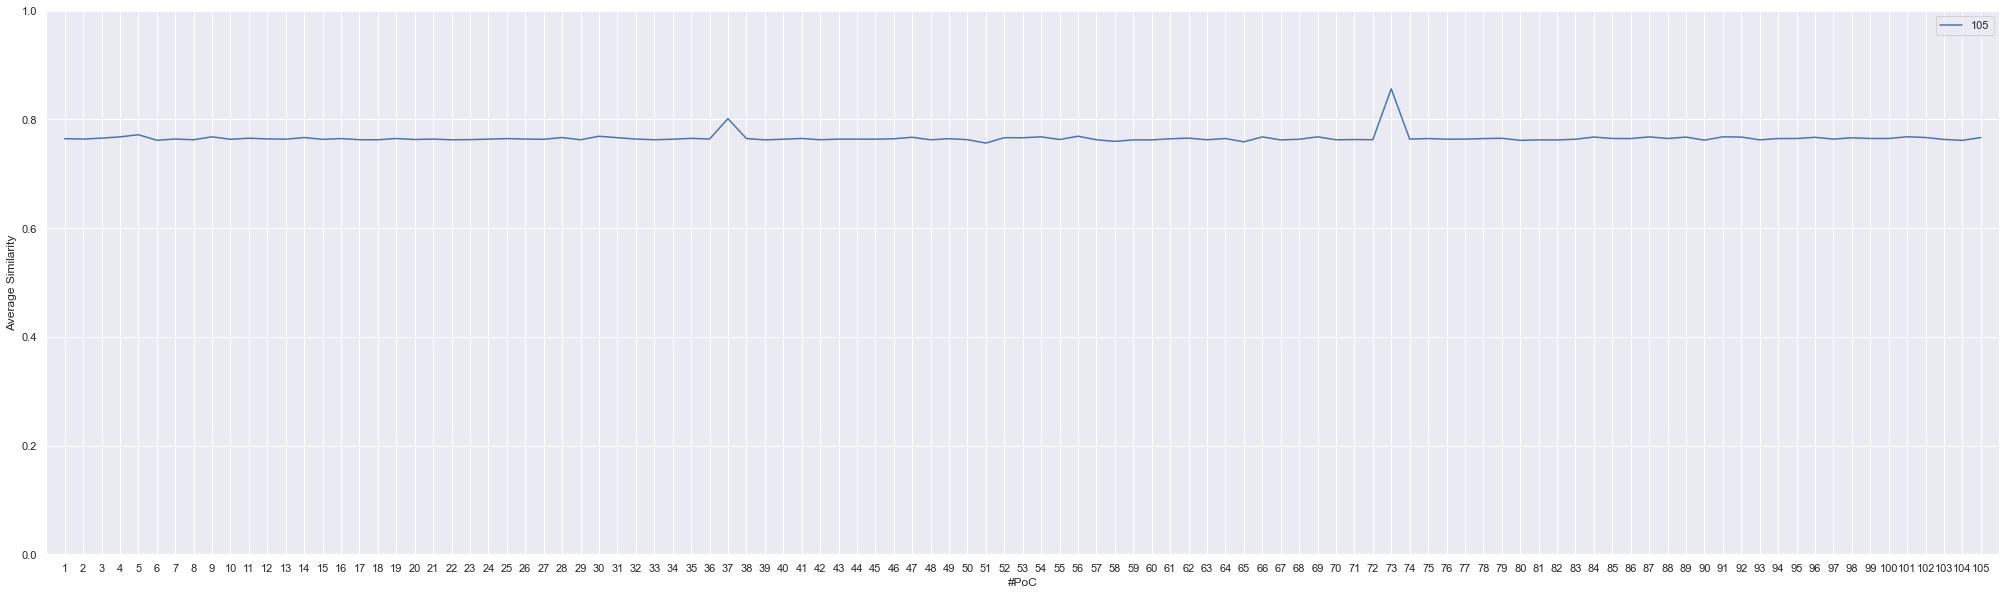

In [4]:
import seaborn
import pandas
import matplotlib.pyplot as plt

# Load similarities
import torch
similarities = results

# Create mapping for x-axis labels
mapping = {}
i = 1
for key in similarities.keys():
    for poc in similarities[key]:
        mapping[poc] = i
        i += 1
    break

# Create function to query mapping
def get_poc(n):
    return list(mapping.keys())[n-1]

seaborn.set(rc={'figure.figsize':(35,10)})
plt.ylim(0,1)
plt.xlim(0, 106)
count = 0
acc = {}
for key in similarities.keys():
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            a = acc[mapping[poc]]
        except:
            acc[mapping[poc]] = 0
        try:
            acc[mapping[poc]] += similarities[key][poc].item()
        except:
            acc[mapping[poc]] += similarities[key][poc]
    count += 1

means = []
for key in acc.keys():
    means.append(acc[key]/count)


res = seaborn.lineplot(x=pocs, y=means, label=key)
res.set(xticks= pocs)
plt.xlabel('#PoC')
plt.ylabel('Average Similarity')
#plt.xticks(rotation=45)
print(count)
plt.show()

